In [14]:
import time

from matplotlib import pyplot as plt
from IPython.display import clear_output

import numpy as np
from scipy.fftpack import fft, ifft, fftshift, fftfreq

In [15]:
def f(x):
    return 2 * np.sin(2 * x + 2) + 5 - 3 * np.cos(0.2 * x - 1)

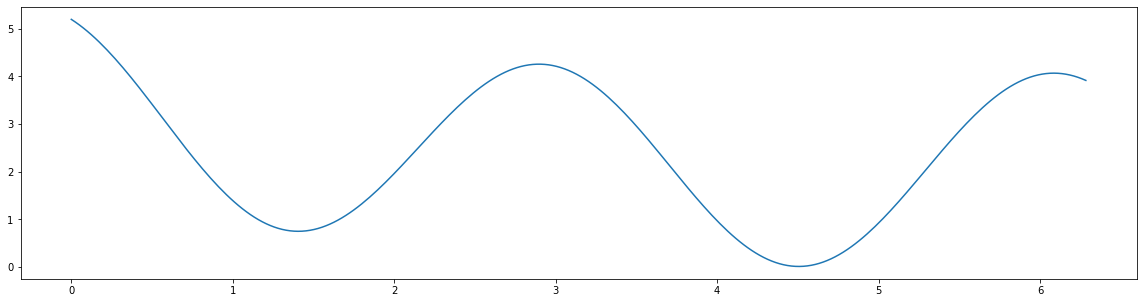

In [16]:
t = np.linspace(0, np.pi * 2, 256)
f_t = f(t)

plt.figure(figsize=(20, 5))
plt.plot(t, f_t)
plt.show()

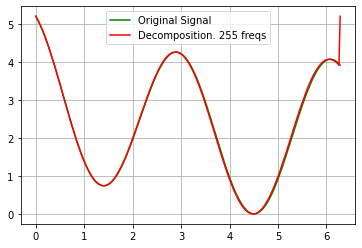

In [17]:
t = np.linspace(0, 2 * np.pi, 256)
f_t = f(t)

n_fft = 256
step = 10
fourier_coefs = fft(f_t, n_fft)
frequencies = fftfreq(n_fft, 2 * np.pi /  256)

decomposition = 0
for i, coef in enumerate(fourier_coefs):        
    sinewave = (1. / len(t)) * \
        (
            coef.real * np.cos(frequencies[i] * 2 * np.pi * t) - \
            coef.imag * np.sin(frequencies[i] * 2 * np.pi * t)
        )
    
    decomposition += sinewave
    
    if i % step == 0 or i == len(fourier_coefs) - 1:
        clear_output()

        plt.plot(t, f_t, label='Original Signal', c='green')
        plt.plot(t, decomposition, c='red', label=f'Decomposition. {i} freqs')
        plt.legend()
        plt.grid()
        plt.show()

        time.sleep(1)